#### Adrien Lemercier, Ecole Polytechnique, December 2019

# Markov Chains for PDEs

In [50]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

Here look at equations on the unite square of the form : $$\Delta f - \gamma f + \delta f^2 = 0$$ with $f=\varphi$ on the unite square and $\gamma \ge \delta \ge 0$.

First, we set the parameters of the equation and the boundary conditions in the two following cells.

In [51]:
"set parameters of the equation above : "
gamma = 0
delta = 0

"don't modify the following line"
assert gamma >= delta >= 0

In [52]:
"define the boundary function you want"
def phi(x,y) :
    if x==0 or x==1 :
        return 1
    else :
        return 0

The other important paramaters, which will be set at the end, are $L$ for discretization and $K$ for Monte-Carlo approximations.

Nothing has to be changed in the cells below.

In [53]:
def phi_discretized (x,y,L) : 
    assert x==0 or x==L or y==0 or y==L  # Not the real boundary definition, but what is useful to assert in                                
    return phi(x/L,y/L)                  # practice because everything evolve inside the unite square.

In [54]:
def border(i,j,L) : 
    "check whether (i,j) is on the boundary or not"
    return (i==0 or i==L or j==0 or j==L)   # Same remark as for phi_discretized

In [55]:
def singleprocess (i,j,L) :
    "process of one single random walk"
    if border(i,j,L) :               # On the boundary, no move
        return [i,j]
    else :                           # Elsewhere, a random move
        p = random.random()
        if 0 <= p < 0.25 :
            return [i+1,j]
        elif p < 0.5 :
            return [i-1,j]
        elif p < 0.75 :
            return [i,j+1]
        else :
            return [i,j-1]

In [56]:
def stop(X,L) :
    "check if the multiple random walk if finished or not, i.e. X is empty or full of positions on the edges"
    if X == [] :
        return True
    else :
        for k in range(len(X)) :
            if border(X[k][0], X[k][1], L) == False :
                return False
        return True 

In [57]:
def process(i,j,L) :
    "simulate a full multiple random walk starting from (i,j)"
    X = [[i,j]]
    beta = delta/(4*L**2)                     # probability to duplicate
    alpha = (gamma-delta)/(4*L**2)            # probability to die
    while not(stop(X,L)) :                    # we continue until the process is done
        for k in range(len(X)):
            if not(border(X[k][0], X[k][1], L)) :
                p = random.random()
                if 0 <= p < alpha :           # X[k] dies
                    X[k] = -1                 # those who die become -1 and will be removed just after the loop
                elif p < alpha + beta :       # X[k] duplicates
                    X.append(X[k])
                else :                        # X[k] moves as a single random walk
                    X[k] = singleprocess(X[k][0], X[k][1], L)
        m = X.count(-1)                       # here we remove all the dead coordinates
        for _ in range(m) :
            X.remove(-1)
    return X

In [58]:
def value(i,j,L) :
    "estimate, on one simulation, the value of our function"
    X = process(i,j,L)
    if X == [] :
        return 0
    else :
        ans = 1
        for k in range(len(X)) :
            ans *=  phi_discretized(X[k][0], X[k][1], L)     # the 'assert' at the beginning of phi_discretized
        return ans                                           # ensures that X[k] is on the edge

In [59]:
def monte_carlo(i,j,L,K) :
    "monte carlo estimation of the expected value by making K simulations"
    if border(i,j,L) :                        # here to make this particular case quicker
        return phi_discretized(i,j,L)
    ans = 0
    for _ in range(K) :
        ans += value(i,j,L)                   # call to independant estimations
    return ans/K

In [60]:
def solution(L,K) :
    "return an array which contains the approximate solution to the PDE at each point, "
    "AND the average time needed to make one simulation"
    ans = np.zeros((L+1,L+1))
    time_to_compute = np.zeros((L+1,L+1))
    t_0 = time.time()                         # time at the beginning
    for i in range(L+1) :
        for j in range(L+1) :
            t_old = time.time()
            ans[i][j] = monte_carlo(i,j,L,K)
            time_to_compute[i][j] = (time.time() - t_old)/K
        print(f"{int((i/L)*100)}% done, time = {round(time.time() - t_0, 2)} s") 
    print("\n" + f"time needed = {round(time.time() - t_0, 1)} s")                
    l = [ans, time_to_compute]
    return l

In [61]:
def plot_solution(L,K):
    "just plot an approximate solution calculated with the previous function, "
    "AND the average time needed"
    l = solution(L,K)
    ans = l[0]
    time_to_compute = l[1]
    print(f"equation parameters : gamma={gamma} and delta={delta}")
    print(f"simulation parameters : L={L} and  K={K}")
    
    fig, ax = plt.subplots(1, 2, figsize = (15,15))
    pcm = ax[0].pcolormesh(ans.T, cmap='jet')
    ax[0].set_title("approximate solution")
    ax[0].set_aspect(aspect='equal')
    pcm2 = ax[1].pcolormesh(time_to_compute.T, cmap='jet')
    ax[1].set_title("average time needed for computation (in s)")
    ax[1].set_aspect(aspect='equal')
    fig.colorbar(pcm, ax=ax[0], shrink=0.4)
    fig.colorbar(pcm2, ax=ax[1], shrink=0.4)

Finally, just write plot_solution$(L,K)$ with the desired value of $K$ and $L$ to get an numerical approximation of the solution.

0% done, time = 0.0 s
2% done, time = 0.31 s
5% done, time = 0.93 s
7% done, time = 1.8 s
10% done, time = 2.85 s
12% done, time = 4.13 s
15% done, time = 5.65 s
17% done, time = 7.3 s
20% done, time = 9.17 s
22% done, time = 11.16 s
25% done, time = 13.27 s
27% done, time = 15.45 s
30% done, time = 17.79 s
32% done, time = 20.17 s
35% done, time = 22.57 s
37% done, time = 25.01 s
40% done, time = 27.57 s
42% done, time = 30.15 s
45% done, time = 32.75 s
47% done, time = 35.38 s
50% done, time = 37.98 s
52% done, time = 40.6 s
55% done, time = 43.16 s
57% done, time = 45.75 s
60% done, time = 48.29 s
62% done, time = 50.91 s
65% done, time = 53.42 s
67% done, time = 55.82 s
70% done, time = 58.11 s
72% done, time = 60.33 s
75% done, time = 62.39 s
77% done, time = 64.32 s
80% done, time = 66.13 s
82% done, time = 67.76 s
85% done, time = 69.23 s
87% done, time = 70.49 s
90% done, time = 71.6 s
92% done, time = 72.47 s
95% done, time = 73.13 s
97% done, time = 73.44 s
100% done, time = 

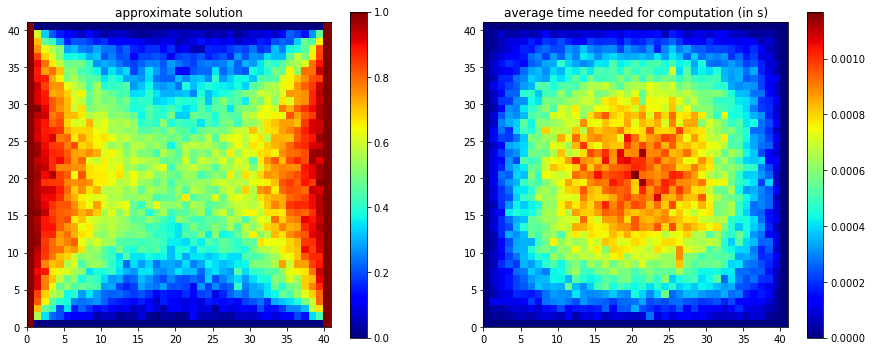

In [62]:
plot_solution(40,100)